In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [593]:
# file = r"outputWed Jun  5 01:34:55 2024"
file = r"Fri Jun  7 14:31:22 2024"

# LIDAR

In [594]:
df_lidar = pd.read_csv(f"output/" + file + "_LOG_LIDAR.csv")
df_lidar.head()

,T,L1,L2,L3
0,10028,97,90,81
1,10120,97,90,81
2,10220,97,90,81
3,10320,97,89,80
4,10420,97,91,80


In [595]:
print(sum(df_lidar['L1'])/len(df_lidar['L1']))
print(sum(df_lidar['L2'])/len(df_lidar['L2']))
print(sum(df_lidar['L3'])/len(df_lidar['L3']))

87.12359550561797
89.93820224719101
75.1685393258427


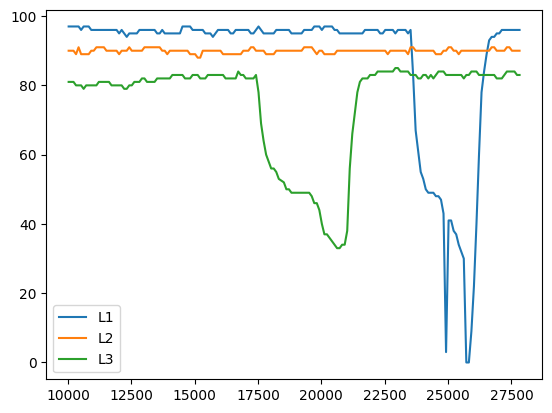

'\nservo 1 = 100\nservo 2 = 85  \nservo 3 = 85\n\nL1 = 106\nL2 = 97\nl3 = 102\n\noffset1 = 6\noffset2 = 12\noffset3 = 17\n\n'

In [596]:
fig, ax = plt.subplots()
ax.plot(df_lidar["T"], df_lidar["L1"], label="L1")
ax.plot(df_lidar["T"], df_lidar["L2"], label="L2")
ax.plot(df_lidar["T"], df_lidar["L3"], label="L3")
ax.legend()
# plt.savefig(save_path)
plt.show()
# fig2 , ax2 = plt.subplots()
# ax2.plot(df["time"], df[" m1"], label="m1")
# ax2.plot(df["time"], df[" m2"], label="m2")
# ax2.plot(df["time"], df[" m3"], label="m3")
# ax2.legend()
# plt.savefig(save_path)
# plt.show()
"""
servo 1 = 100
servo 2 = 85  
servo 3 = 85

L1 = 106
L2 = 97
l3 = 102

offset1 = 6
offset2 = 12
offset3 = 17

"""

# ADC

In [597]:
df_adc = pd.read_csv(f"output/" + file + "_LOG_ADC.csv")
# df_adc.head()

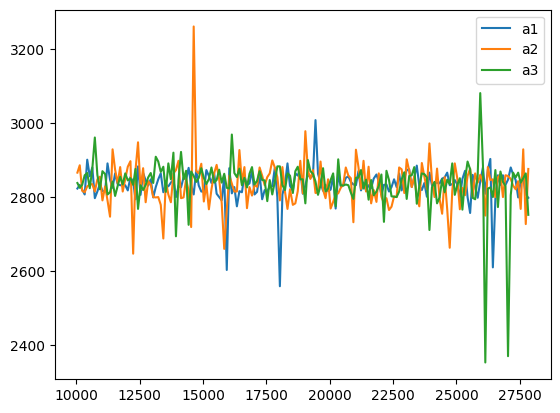

In [598]:
fig, ax = plt.subplots()
mask = df_adc["T"].diff().fillna(0) >= 0
df_clean = df_adc[mask]

ax.plot(df_clean["T"], df_clean["a1"], label="a1")
ax.plot(df_clean["T"], df_clean["a2"], label="a2")
ax.plot(df_clean["T"], df_clean["a3"], label="a3")
ax.legend()
# plt.savefig(save_path)
plt.show()

servo 1 = 10
servo 2 = 8.5  
servo 3 = 8.5

In [599]:
print(df_clean["a1"].describe())

count     179.000000
mean     2833.608939
std        43.024988
min      2559.000000
25%      2817.000000
50%      2833.000000
75%      2856.500000
max      3008.000000
Name: a1, dtype: float64


In [600]:
df_adc_raw = pd.read_csv(f"output/" + file + "_LOG_RAW_ADC.csv")
df_adc_raw.head()

,T,a1,a2,a3
0,5323,2830,2864,2811
1,5353,2875,2845,2832
2,5386,2845,2886,2817
3,5419,2800,2885,2841
4,5452,2832,2832,2833


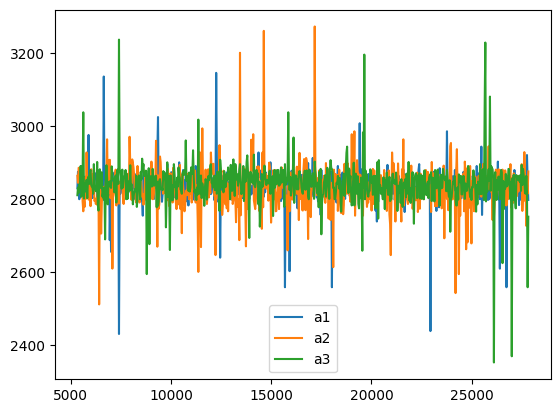

In [601]:
fig, ax = plt.subplots()
ax.plot(df_adc_raw["T"], df_adc_raw["a1"], label="a1")
ax.plot(df_adc_raw["T"], df_adc_raw["a2"], label="a2")
ax.plot(df_adc_raw["T"], df_adc_raw["a3"], label="a3")
ax.legend()
# plt.savefig(save_path)
plt.show()

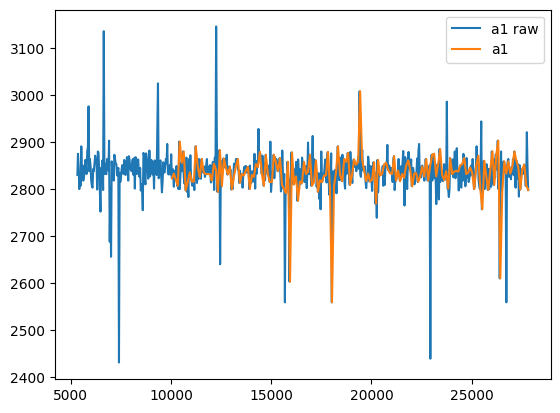

In [602]:
fig, ax = plt.subplots()
ax.plot(df_adc_raw["T"], df_adc_raw["a1"], label="a1 raw")
ax.plot(df_adc["T"], df_adc["a1"], label="a1")

ax.legend()
# plt.savefig(save_path)
plt.show()

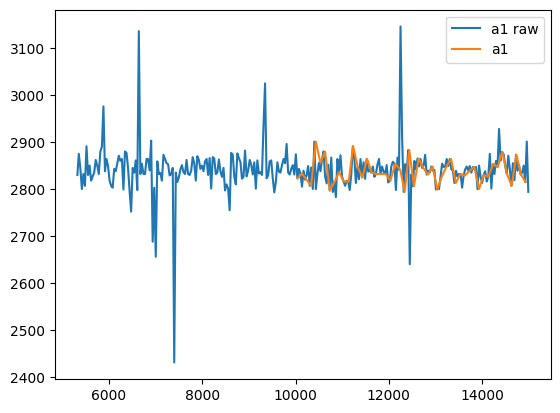

In [603]:
df_adc_raw2 = df_adc_raw[df_adc_raw["T"] < 15000]
df_adc2 = df_adc[df_adc["T"] < 15000]


fig, ax = plt.subplots()
ax.plot(df_adc_raw2["T"], df_adc_raw2["a1"], label="a1 raw")
ax.plot(df_adc2["T"], df_adc2["a1"], label="a1")

ax.legend()
# plt.savefig(save_path)
plt.show()

In [604]:
# df_lain = pd.read_csv('output/Wed Jun  5 20:22:42 2024_LOG_ADC.csv')

# fig, ax = plt.subplots()
# mask = df_lain["T"].diff().fillna(0) >= 0
# df_clean = df_lain[mask]
# ax.plot(df_clean["T"], df_clean["a1"], label="a1_lain")
# ax.plot(df_adc["T"], df_adc["a1"], label="a1")



In [606]:
# for i in df.iterrows():
#     print(i)
#     print(i[1])
#     break

# FK

In [607]:
df = pd.read_csv(f"output/"+file+"_LOG_FK.csv")
# df.head().describe()
# df['T'] = df['T'].apply(lambda x: x/1000)
# df['T'] =df['T']/1000
df.head()

,T,x1,y1,z1,x2,y2,z2,x3,y3,z3,pitch,roll
0,10010,0,0,0,0,0,0,0,0,0,0.00,0.00
1,10110,-101,174,207,95,165,212,193,0,201,0.00,-0.00
2,10210,-101,174,207,95,165,212,193,0,201,-2.91,-176.29
3,10310,-101,174,207,95,165,212,193,0,201,-2.81,-176.49
4,10410,-101,174,207,95,165,212,193,0,201,-2.32,-176.73


In [608]:
df.keys()

Index(['T', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'pitch',
       'roll'],
      dtype='object')

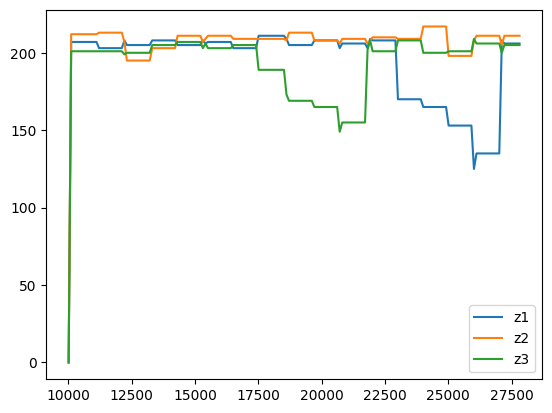

In [609]:
fig, ax = plt.subplots()
ax.plot(df["T"], df["z1"], label="z1")
ax.plot(df["T"], df["z2"], label="z2")
ax.plot(df["T"], df["z3"], label="z3")
ax.legend()
# plt.savefig(save_path)
plt.show()

In [610]:
print(df["z1"].describe())
print(df["z2"].describe())
print(df["z3"].describe())

count    179.000000
mean     193.458101
std       27.002334
min        0.000000
25%      203.000000
50%      205.000000
75%      208.000000
max      211.000000
Name: z1, dtype: float64
count    179.000000
mean     207.497207
std       16.434881
min        0.000000
25%      208.000000
50%      209.000000
75%      211.000000
max      217.000000
Name: z2, dtype: float64
count    179.000000
mean     194.044693
std       21.582562
min        0.000000
25%      199.500000
50%      201.000000
75%      205.000000
max      209.000000
Name: z3, dtype: float64


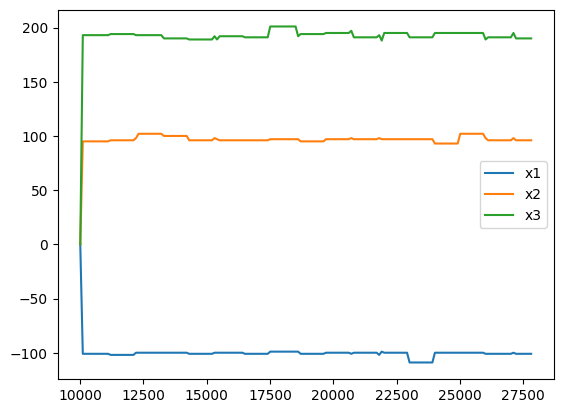

In [611]:
fig, ax = plt.subplots()
ax.plot(df["T"], df["x1"], label="x1")
ax.plot(df["T"], df["x2"], label="x2")
ax.plot(df["T"], df["x3"], label="x3")
ax.legend()
# plt.savefig(save_path)
plt.show()

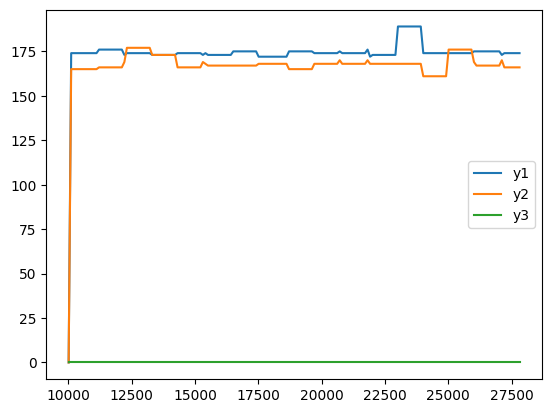

In [612]:
fig, ax = plt.subplots()
ax.plot(df["T"], df["y1"], label="y1")
ax.plot(df["T"], df["y2"], label="y2")
ax.plot(df["T"], df["y3"], label="y3")
ax.legend()
# plt.savefig(save_path)
plt.show()

In [613]:
df['roll'].describe()

count    179.000000
mean    -124.140000
std      105.776062
min     -179.100000
25%     -177.675000
50%     -176.770000
75%     -168.150000
max      179.700000
Name: roll, dtype: float64

In [622]:
import numpy as np


def calculate_roll_pitch(point1, point2, point3):
    """
    Calculate roll and pitch angles from three points.

    Args:
        point1, point2, point3: Three points in 3D space as numpy arrays (x, y, z).

    Returns:
        roll: Roll angle in degrees.
        pitch: Pitch angle in degrees.
    """
    # Calculate vectors between points
    v1 = point2 - point1
    v2 = point3 - point1

    # Calculate normal vector
    normal = np.cross(v1, v2)

    # Normalize normal vector
    normal /= np.linalg.norm(normal)

    # Calculate pitch angle
    pitch = np.arctan2(normal[1], normal[2]) * 180 / np.pi
    if pitch > 90:
        pitch -= 180

    if pitch < -90:
        pitch += 180

    # Calculate roll angle
    roll = np.arctan2(normal[0], normal[2]) * 180 / np.pi
    # roll = np.arcsin(-normal[0]) * 180 / np.pi

    return roll, pitch

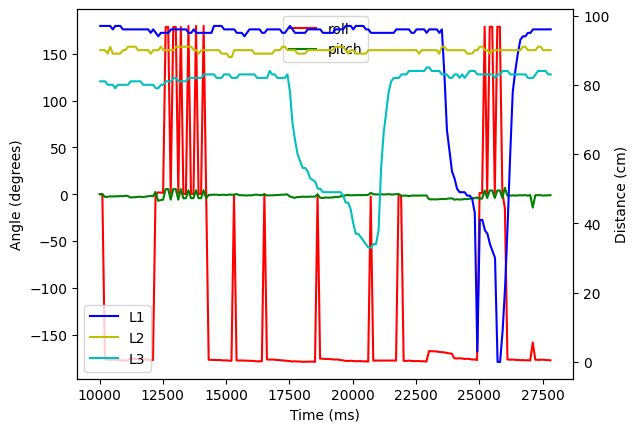

In [614]:
fig, ax = plt.subplots()
ax.plot(df["T"], df["roll"], label="roll", color='r')
ax.plot(df["T"], df["pitch"], label="pitch", color='g')
ax2 = ax.twinx()
ax2.plot(df_lidar["T"], df_lidar["L1"], label="L1", color='b')
ax2.plot(df_lidar["T"], df_lidar["L2"], label="L2", color='y')
ax2.plot(df_lidar["T"], df_lidar["L3"], label="L3", color='c')
# ax3 = ax.twinx()
# ax3.plot(df_adc["T"], (df_adc["a1"] - df_adc['a1'].min())/6, label="a1", color='m')
# ax3.plot(df_adc["T"], (df_adc["a2"] - df_adc['a2'].min())/6, label="a2", color='k')
# ax3.plot(df_adc["T"], (df_adc["a3"] - df_adc['a3'].min())/6, label="a3", color='orange')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Angle (degrees)")
ax2.set_ylabel("Distance (cm)")
# ax3.set_ylabel("V")

ax.legend()
ax2.legend()
# ax3.legend()
# plt.savefig(save_path)
plt.show()

In [615]:
roll = []
pitch = []
for i in df.iterrows():
    row = i[1]
    rolltmp, pitchtmp = calculate_roll_pitch(np.array([row["x1"], row["y1"], row["z1"]]),
                                       np.array([row["x2"], row["y2"], row["z2"]]),
                                       np.array([row["x3"], row["y3"], row["z3"]]))
    roll.append(rolltmp)
    pitch.append(pitchtmp)

/tmp/ipykernel_114576/3049364791.py:23: RuntimeWarning: invalid value encountered in divide
  normal /= np.linalg.norm(normal)


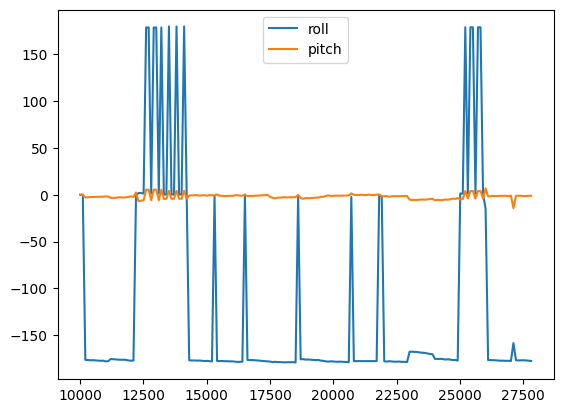

In [616]:
fig, ax = plt.subplots()
ax.plot(df["T"], df['roll'], label="roll")
ax.plot(df["T"], df['pitch'], label="pitch")
ax.legend()

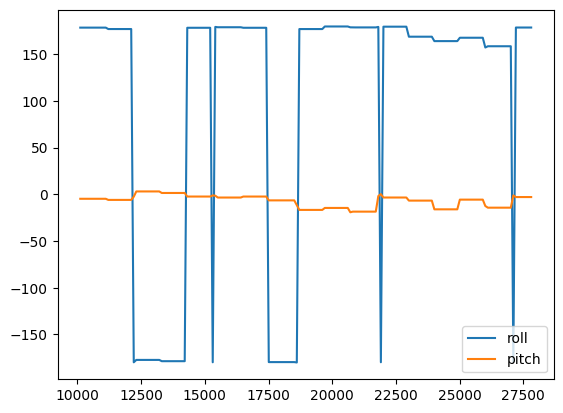

In [621]:
fig, ax = plt.subplots()
ax.plot(df["T"], roll, label="roll")
ax.plot(df["T"], pitch, label="pitch")
ax.legend()

In [618]:
# calculate roll and pitch from FK


In [619]:
df_pid = pd.read_csv(f"output/" + file + "_LOG_PID.csv")
df_pid.head()

,T,pcl,rcl,pci,rci
0,7251,0.0,0.0,0.0,0.0
1,7351,0.0,0.0,0.0,0.0
2,7453,0.0,0.0,0.0,0.0
3,7553,0.0,0.0,0.0,0.0
4,7651,0.0,0.0,0.0,0.0


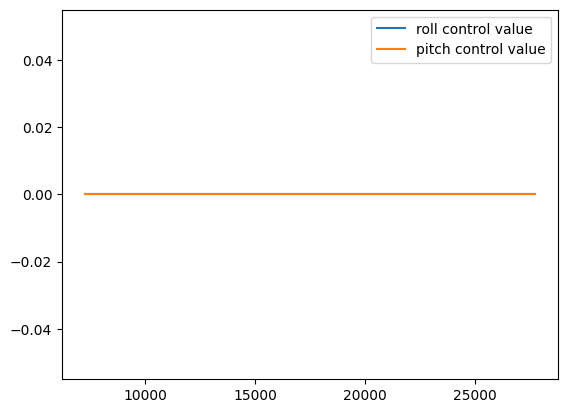

In [620]:
fig, ax = plt.subplots()
ax.plot(df_pid["T"], df_pid['rcl'], label="roll control value")
ax.plot(df_pid["T"], df_pid['pcl'], label="pitch control value")
ax.legend()